In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.drop(['PassengerId','Ticket','Name'],inplace=True,axis=1)

In [4]:
table = pd.pivot_table(data=df,index=['Sex'])
table

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,30.272362,49.747699,0.598684,2.144737,0.565789,1
male,30.272732,27.527877,0.274436,2.334586,0.379699,0


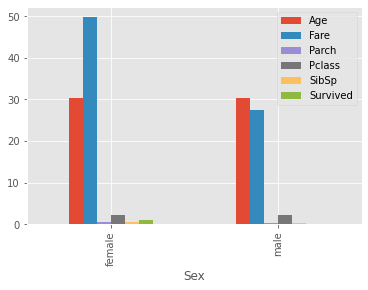

In [5]:
table.plot(kind='bar');

In [6]:
table = pd.pivot_table(df,index=['Sex','Pclass'])
table

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       41.333333  115.591168  0.500000  0.560000         1
       2       24.376552   26.438750  0.766667  0.533333         1
       3       23.073400   13.735129  0.597222  0.583333         1
male   1       40.520000   75.586551  0.280702  0.403509         0
       2       30.940678   20.184654  0.142857  0.301587         0
       3       24.525104   11.826350  0.328767  0.404110         0

In [7]:
table = pd.pivot_table(df,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})
table

Age  Survived
Sex    Pclass                     
female 1       41.333333        50
       2       24.376552        30
       3       23.073400        72
male   1       40.520000         0
       2       30.940678         0
       3       24.525104         0

In [8]:
table = pd.pivot_table(df,index=['Sex','Pclass'],values=['Survived'], aggfunc=np.mean)
table

Survived
Sex    Pclass          
female 1              1
       2              1
       3              1
male   1              0
       2              0
       3              0

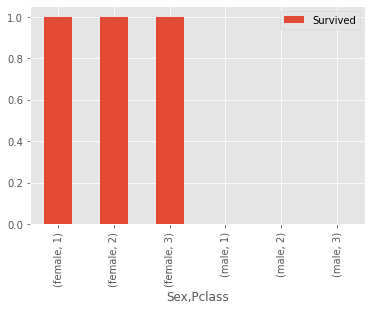

In [9]:
table.plot(kind='bar');

In [10]:
table = pd.pivot_table(df,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.sum)
table

Survived        
Pclass        1   2   3
Sex                    
female       50  30  72
male          0   0   0

In [11]:
stacked = table.stack()

In [12]:
stacked

Survived
Sex    Pclass          
female 1             50
       2             30
       3             72
male   1              0
       2              0
       3              0

In [16]:
stacked.unstack('Pclass')

Survived        
Pclass        1   2   3
Sex                    
female       50  30  72
male          0   0   0

In [17]:
index = pd.MultiIndex.from_product([[2, 1], ["a", "b"]])


In [18]:
df = pd.DataFrame(np.random.randn(4), index=index, columns=["A"])

df

A
2 a -0.413571
  b  0.638419
1 a  1.407662
  b  0.632781

In [19]:
columns = pd.MultiIndex.from_tuples(
    [
        ("A", "cat", "long"),
        ("B", "cat", "long"),
        ("A", "dog", "short"),
        ("B", "dog", "short"),
    ],
    names=["exp", "animal", "hair_length"],
)

In [20]:
index = pd.MultiIndex.from_product(
    [("bar", "baz", "foo", "qux"), ("one", "two")], names=["first", "second"]
)

In [21]:
df = pd.DataFrame(np.random.randn(8, 4), index=index, columns=columns)

df2 = df.iloc[[0, 1, 2, 4, 5, 7]]

df2

exp                  A         B         A         B
animal             cat       cat       dog       dog
hair_length       long      long     short     short
first second                                        
bar   one    -0.512038 -1.523324 -1.569452 -3.467978
      two    -0.090557  1.724505 -0.747896  0.920233
baz   one    -0.848420 -0.571088  0.756647 -0.481623
foo   one    -0.481694  1.234649  1.125956  0.961933
      two    -0.053318 -0.197080  0.410954 -0.688536
qux   two     0.652798  0.337004 -0.163572 -0.149691

In [22]:
df2.stack("exp")

animal                 cat       dog
hair_length           long     short
first second exp                    
bar   one    A   -0.512038 -1.569452
             B   -1.523324 -3.467978
      two    A   -0.090557 -0.747896
             B    1.724505  0.920233
baz   one    A   -0.848420  0.756647
             B   -0.571088 -0.481623
foo   one    A   -0.481694  1.125956
             B    1.234649  0.961933
      two    A   -0.053318  0.410954
             B   -0.197080 -0.688536
qux   two    A    0.652798 -0.163572
             B    0.337004 -0.149691

In [23]:
df2.stack("animal")

exp                         A                   B          
hair_length              long     short      long     short
first second animal                                        
bar   one    cat    -0.512038       NaN -1.523324       NaN
             dog          NaN -1.569452       NaN -3.467978
      two    cat    -0.090557       NaN  1.724505       NaN
             dog          NaN -0.747896       NaN  0.920233
baz   one    cat    -0.848420       NaN -0.571088       NaN
             dog          NaN  0.756647       NaN -0.481623
foo   one    cat    -0.481694       NaN  1.234649       NaN
             dog          NaN  1.125956       NaN  0.961933
      two    cat    -0.053318       NaN -0.197080       NaN
             dog          NaN  0.410954       NaN -0.688536
qux   two    cat     0.652798       NaN  0.337004       NaN
             dog          NaN -0.163572       NaN -0.149691

In [24]:
df.stack(level=["animal", "hair_length"])

exp                                     A         B
first second animal hair_length                    
bar   one    cat    long        -0.512038 -1.523324
             dog    short       -1.569452 -3.467978
      two    cat    long        -0.090557  1.724505
             dog    short       -0.747896  0.920233
baz   one    cat    long        -0.848420 -0.571088
             dog    short        0.756647 -0.481623
      two    cat    long        -0.700096  0.284495
             dog    short        1.064077  1.408492
foo   one    cat    long        -0.481694  1.234649
             dog    short        1.125956  0.961933
      two    cat    long        -0.053318 -0.197080
             dog    short        0.410954 -0.688536
qux   one    cat    long        -0.733123  0.530327
             dog    short       -0.346689 -1.171089
      two    cat    long         0.652798  0.337004
             dog    short       -0.163572 -0.149691

In [25]:
df.stack(level=[1, 2])

exp                                     A         B
first second animal hair_length                    
bar   one    cat    long        -0.512038 -1.523324
             dog    short       -1.569452 -3.467978
      two    cat    long        -0.090557  1.724505
             dog    short       -0.747896  0.920233
baz   one    cat    long        -0.848420 -0.571088
             dog    short        0.756647 -0.481623
      two    cat    long        -0.700096  0.284495
             dog    short        1.064077  1.408492
foo   one    cat    long        -0.481694  1.234649
             dog    short        1.125956  0.961933
      two    cat    long        -0.053318 -0.197080
             dog    short        0.410954 -0.688536
qux   one    cat    long        -0.733123  0.530327
             dog    short       -0.346689 -1.171089
      two    cat    long         0.652798  0.337004
             dog    short       -0.163572 -0.149691